In [1]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def residual(y, z):
    return - (z - y)

Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [33]:
def gb_predict(X, trees_list, n_list, eta):
    predictions = np.array([sum([eta* n * alg.predict([x])[0] for alg, n in zip(trees_list, n_list)]) for x in X])
    return predictions

In [34]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, n, eta):
    
    trees = []
    
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        if len(trees) == 0:
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, n, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, n, eta)))
        else:
            target = gb_predict(X_train, trees, n, eta)

            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, n, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, n, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [38]:
n_trees = 20
n = [1] * n_trees
max_depth = 10
eta = 0.1
train_errors_arr = []
test_errors_arr = []

for i in list(range(1, max_depth)):
    trees, train_errors, test_errors = gb_fit(n_trees, i, X_train, X_test, y_train, y_test, n, eta)
    train_prediction = gb_predict(X_train, trees, n, eta)
    test_prediction = gb_predict(X_test, trees, n, eta)
    train_err = mean_squared_error(y_train, train_prediction)
    test_err = mean_squared_error(y_test, test_prediction)
    train_errors_arr.append(train_err)
    test_errors_arr.append(test_err)

In [39]:
def depth_error_plot(max_depth, train_err, test_err):
    plt.xlabel('tree_depth')
    plt.ylabel('MSE')
    plt.xlim(0, max_depth)
    plt.plot(list(range(1, max_depth)), train_err, label='train error')
    plt.plot(list(range(1, max_depth)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

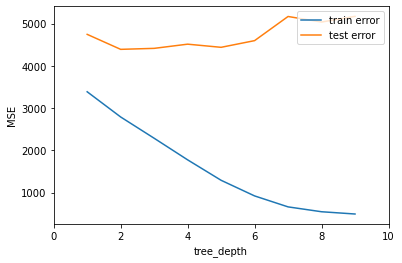

In [40]:
depth_error_plot(max_depth, train_errors_arr, test_errors_arr)
